<a href="https://colab.research.google.com/github/bidyutmondal/Recommendor-System/blob/main/MTP_2_(Market_Basket_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MARKET BASKET ANALYSIS**

In [11]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing the libraries**

In [12]:
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import io

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.csv to Online Retail (2).csv


**Dataset Imported**

In [14]:
consumer_df=pd.read_csv(io.BytesIO(uploaded['Online Retail.csv']))
print(consumer_df.shape)
display(consumer_df.head())

(9834, 32)


,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Preparing the data for Market Basket Analysis**

Pruning the dataset to take only some parameters from datset such as minimum transaction length and total sale percentage.

In [15]:
def prune_Dataset(input_df= consumer_df,length_trans = 2,total_sales_perc = 0.40):
    final_df2 = pd.DataFrame()
    for i in range(input_df.shape[0]):
        cnt = 0
        new_input = input_df.iloc[:][i:i+1]
        for j in range(new_input.shape[1]):
            if new_input.iloc[:,j].isnull().bool():
                if cnt <= length_trans:
                    break
                if cnt == 31:
                    final_df2 = final_df2.append(new_input,ignore_index=True)
            cnt+=1
    final_df2.columns=[i for i in range(len(final_df2.columns))]
    dict2 = dict()
    for i in range(final_df2.shape[1]):
        for j in range(final_df2.shape[0]):
            if final_df2[i][j] == "NaN":
                continue
            elif final_df2[i][j] in dict2:
                dict2[final_df2[i][j]] += 1
            else:
                dict2[final_df2[i][j]] =1
                   
    total_purchase = sum(dict2.values())
    market_sort = []
    for i,j in sorted(dict2.items(), key=lambda item: item[1], reverse = True):
        market_sort.append([i,j,float(int(j) * 100 /total_purchase)])
    new_market_df = pd.DataFrame(market_sort,columns=["item_name","item_count","item_perc"])
    new_market_df2 = new_market_df[new_market_df["item_name"].isnull() == False]
    new_total_purchase = sum(new_market_df2["item_count"])
    new_market_df3 = new_market_df2[["item_name","item_count"]]
    li = []
    for i in range(new_market_df3.shape[0]):
        li.append(float(new_market_df3["item_count"][i:i+1] / new_total_purchase))
    new_market_df3.insert(2,"item_perc",li,True)
    out_df = pd.DataFrame()
    for i in range(new_market_df3.shape[0]):
        if sum(new_market_df3["item_perc"].head(i)) > total_sales_perc:
            out_df = new_market_df3.head(i-1)
            break
    final_list = [final_df2,new_market_df2,new_market_df3,out_df]
    return final_list

final_market_list = prune_Dataset()
final_item_df = final_market_list[0]
display(final_item_df.head(5))

<ipython-input-15-b981435913c3>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(new_input,ignore_index=True)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
final_market_df = final_market_list[1]
final_market_df_without_null = final_market_list[2]
output_df = final_market_list[3]
display(final_market_df.head())
display(final_market_df_without_null.head(20))
display(output_df.head(20))

,item_name,item_count,item_perc
1,whole milk,2186,1.132689
2,other vegetables,1727,0.894856
3,rolls/buns,1466,0.759617
4,soda,1340,0.694329
5,yogurt,1229,0.636814


,item_name,item_count,item_perc
1,whole milk,2186,0.057699
2,other vegetables,1727,0.045584
3,rolls/buns,1466,0.038695
4,soda,1340,0.035369
5,yogurt,1229,0.032439
6,root vegetables,1005,0.026527
7,tropical fruit,946,0.024970
8,bottled water,920,0.024283
9,shopping bags,869,0.022937
10,sausage,840,0.022172


,item_name,item_count,item_perc
1,whole milk,2186,0.057699
2,other vegetables,1727,0.045584
3,rolls/buns,1466,0.038695
4,soda,1340,0.035369
5,yogurt,1229,0.032439
6,root vegetables,1005,0.026527
7,tropical fruit,946,0.024970
8,bottled water,920,0.024283
9,shopping bags,869,0.022937
10,sausage,840,0.022172


**Exploratory Data Analysis**

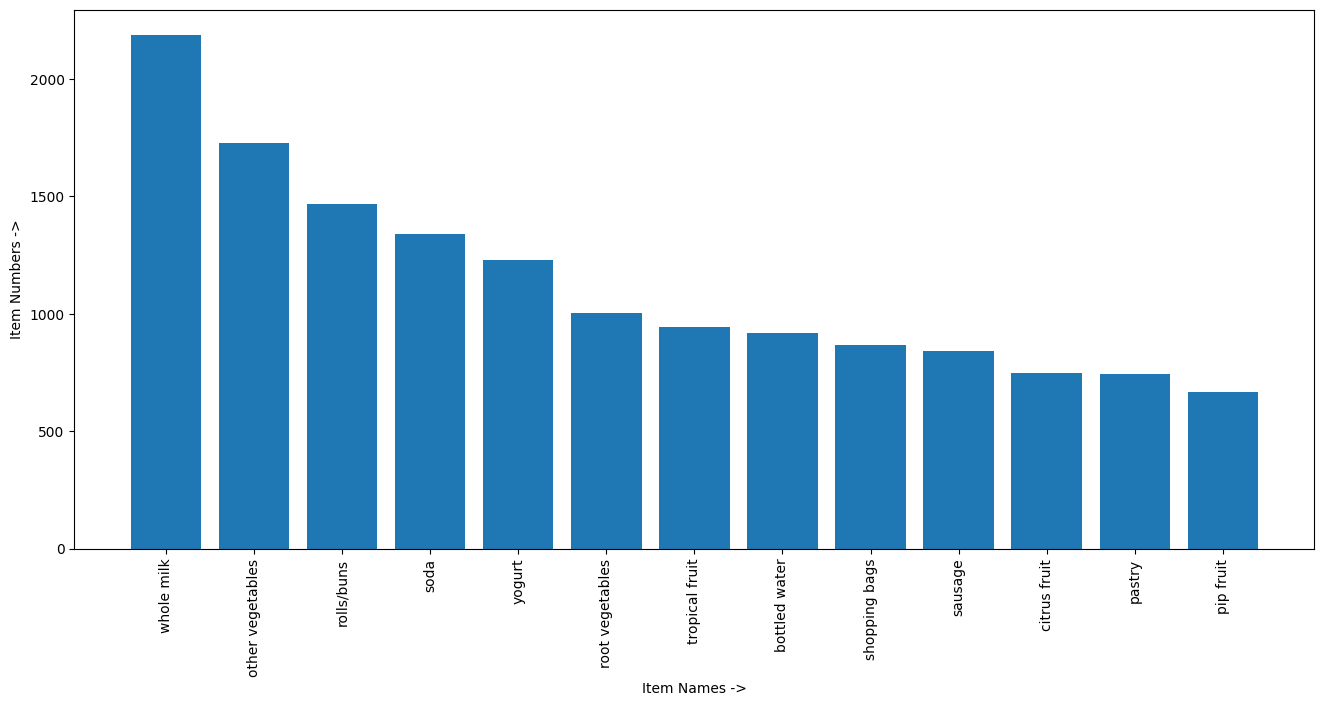

In [17]:
plt.figure(figsize=[16,7])
plt.bar(output_df["item_name"],output_df["item_count"])
plt.ylabel("Item Numbers ->")
plt.xlabel("Item Names ->")
plt.xticks(rotation = 90)
plt.show()

**Filtered Dataset**

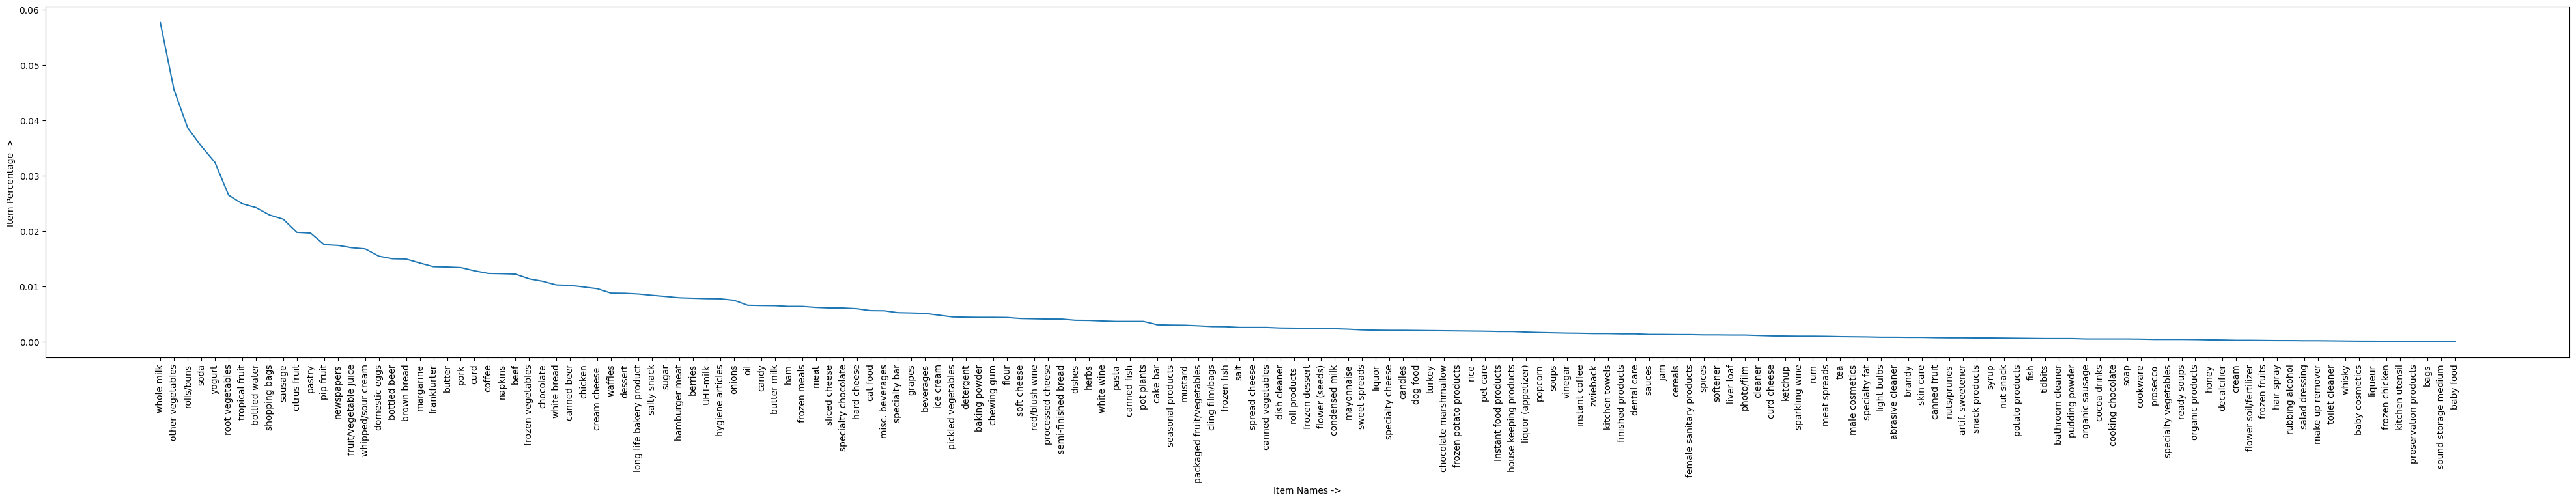

In [18]:
plt.figure(figsize=[50,7])
plt.plot(final_market_df_without_null["item_name"],final_market_df_without_null["item_perc"])
plt.ylabel("Item Percentage ->")
plt.xlabel("Item Names ->")
plt.xticks(rotation = 90)
plt.show()

# **Association Rule**

In [19]:
records = []
row = final_item_df.shape[0]
col = final_item_df.shape[1]
for i in range(0,row):
    records.append([str(final_item_df.values[i,j]) for j in range(0, col)])

association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

for data in association_results:
    print(data)

RelationRecord(items=frozenset({'Instant food products', 'hamburger meat'}), support=0.00497429945282706, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.4225352112676057, lift=8.438112116407051)])
RelationRecord(items=frozenset({'bottled beer', 'liquor'}), support=0.00580334936163157, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liquor'}), items_add=frozenset({'bottled beer'}), confidence=0.4375, lift=4.63719244288225)])
RelationRecord(items=frozenset({'bottled beer', 'red/blush wine'}), support=0.0076272591610014925, ordered_statistics=[OrderedStatistic(items_base=frozenset({'red/blush wine'}), items_add=frozenset({'bottled beer'}), confidence=0.2911392405063291, lift=3.08587128206269)])
RelationRecord(items=frozenset({'flour', 'sugar'}), support=0.0077930691427623945, ordered_statistics=[OrderedStatistic(items_base=frozenset({'flour'}), items_add=frozenset({'sugar'}), confidenc

In [21]:
results = []
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    
    consequent = str(items[0])
    antecedent = str(items[1])
    support = str(item[1])[:7]
    confidence = str(item[2][0][2])[:7]
    lift = str(item[2][0][3])[:7]
    
    rows = (consequent,antecedent,support,confidence,lift)
    results.append(rows)
    
    final_result = pd.DataFrame(results,columns=['Consequent','Anticedent','Support','Confidence','Lift'])

final_result= final_result.sort_values("Support",ascending=False, ignore_index=True) #result obtained from association rule
final_result = final_result[(final_result["Consequent"] != 'nan') & (final_result["Anticedent"] != 'nan')]
display(final_result)

#readable results
for i in range(final_result.shape[0]):
    print(f"Customers buying {final_result.Anticedent[i:i+1].values[0]} are more inclined to make a purchase of {final_result.Consequent[i:i+1].values[0]}.")

,Consequent,Anticedent,Support,Confidence,Lift
0,yogurt,tropical fruit,0.00911,0.21825,3.23412
1,tropical fruit,yogurt,0.00911,0.21825,3.23412
3,ham,white bread,0.00829,0.20576,3.18191
4,tropical fruit,other vegetables,0.00795,0.23300,3.33005
5,yogurt,tropical fruit,0.00795,0.23300,3.33005
7,flour,sugar,0.00779,0.28143,5.45770
9,bottled beer,red/blush wine,0.00762,0.29113,3.08587
10,tropical fruit,other vegetables,0.00712,0.24855,4.31998
11,tropical fruit,citrus fruit,0.00712,0.24855,4.31998
13,yogurt,tropical fruit,0.00696,0.31111,3.46182


Customers buying tropical fruit are more inclined to make a purchase of yogurt.
Customers buying yogurt are more inclined to make a purchase of tropical fruit.
Customers buying white bread are more inclined to make a purchase of ham.
Customers buying other vegetables are more inclined to make a purchase of tropical fruit.
Customers buying tropical fruit are more inclined to make a purchase of yogurt.
Customers buying sugar are more inclined to make a purchase of flour.
Customers buying red/blush wine are more inclined to make a purchase of bottled beer.
Customers buying other vegetables are more inclined to make a purchase of tropical fruit.
Customers buying citrus fruit are more inclined to make a purchase of tropical fruit.
Customers buying tropical fruit are more inclined to make a purchase of yogurt.
Customers buying yogurt are more inclined to make a purchase of tropical fruit.
Customers buying berries are more inclined to make a purchase of whole milk.
Customers buying processed 